In [35]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision
import numpy as np

In [29]:
def make_weights_for_balanced_classes(imgs, nclasses):
    labels = []
    for i in range(len(imgs)):
        labels.append(imgs[i][1])

    label_array = np.array(labels)
    total = len(labels)

    count_list = []
    for cls in range(nclasses):
        count = len(np.where(label_array == cls)[0])
        count_list.append(total/count)

    weights = []
    for label in label_array:
        weights.append(count_list[label])

    return weights

In [30]:
transform = transforms.Compose([
    transforms.ToPILImage(), 
    transforms.RandomCrop(60), 
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.ToTensor()
])

In [33]:
trainset = torchvision.datasets.ImageFolder(root='class', transform=transform)
weights = make_weights_for_balanced_classes(trainset.imgs, len(trainset.classes))
weights = torch.DoubleTensor(weights)
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))
train_loader = DataLoader(trainset, batch_size=32, sampler=sampler)

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_ins = [40, 45, 30, 62, 70, 153, 395, 46, 75, 194]
weights = [1 - (x / sum(num_ins)) for x in num_ins]
class_weights = torch.FloatTensor(weights).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

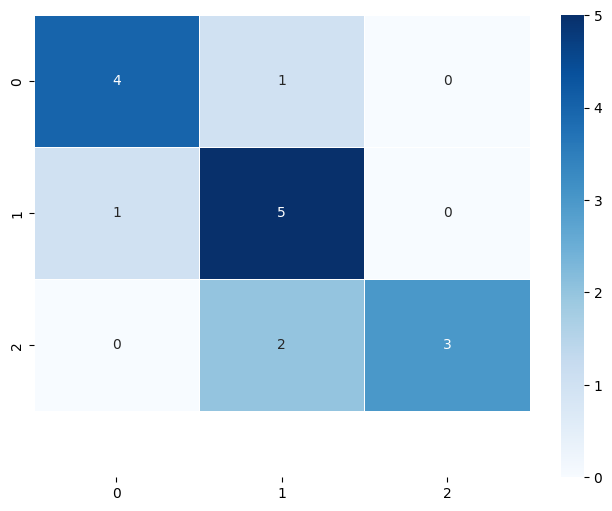

In [51]:
actual = [1,1,1,1,1,1,0,0,0,0,0,2,2,2,2,2]
prediction = [1,1,1,0,1,1,0,0,0,1,0,2,2,2,1,1]
c_mat = confusion_matrix(actual, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(c_mat, annot=True, fmt='d', cmap='Blues', linewidths=.5)
b, t = plt.ylim()
b += 0.5
t -+ 0.5
plt.ylim(b, t)
plt.savefig('confusion_matrix.png')
plt.show()